# Módulo: MODELOS DE INTELIGENCIA ARTIFICIAL
## Ejercicio práctico 1.
## Sistema Basado en Reglas   
### Análisis de la calidad del aire

De forma similar a lo realizado en el notebook SBR_IRIS, construye un sistema de clasificación de la calidad del aire (AirQuality - AQI) en función de la cantidad de Ozono detectado en el mismo.   
Los valores del nivel de AQI se muestran en la siguiente tabla:  


| NIVEL AQI | RANGO-DESCRIPCIÓN|
|:---------:|:----------------:|
|   BUENO   |     0 - 50       |
| MODERADO  |    51 - 100      |
|CONTAMINADO|   101 - 150      |
|  INSANO   |   151 - 200      |
| PELIGROSO |       > 200      |

Se pide intentar establecer la clasificación según la tabla anterior en base a alguna de las características que conforman el dataset (Valor de O2, Valor de CO, Valor de NO2, Valor de PM2.5, Longitud y Latitud).   
Como los datos son numéricos y no faltan valores, no se requiere ningún procesamiento previo.   

Nuestro objetivo es predecir el AQI, por lo que esta tarea sería de clasificación o de regresión, pero en este caso vamos a tratar de establecer un SBR basado en una de las variables independientes citadas.

<u>Nota sobre la característica ***PM2.5***</u> :   
Este valor se corresponde con la concentración del material particulado (*PM - Particulate Matter*) de la fracción de tamaño PM2,5 (2.5 micrometros), el cúal se encuentra íntimamente asociado a problemas de salud dado que entre sus efectos aparecen impactos claros sobre las enfermedades cardiacas y pulmonares.   

Importamos librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ocultamos los warnings de las librerías
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------

Cargamos dataset *airquality.csv*

In [2]:
# Cargamos el dataset
data = pd.read_csv('datasets/airquality.csv')

Mostramos los primeros registros

In [15]:
data.head(20)

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0          51             1               36              0               51   
1          41             1                5              1               41   
2          41             1                5              1               41   
3          66             1               39              2               66   
4          34             1               34              0               20   
5          54             1               14             11               54   
6          54             1               14             11               54   
7          64             1               29              7               64   
8          54             1               41              1               54   
9          68             2               68              1               58   
10         41             1               24              6               41   
11         59             1               30              4               59   
12         55             1               47              0               55   
13         72             1                4             23               72   
14         28             1               28              2               28   
15        154             5                0             13              154   
16         67             1               16              2               67   
17         62             1               37              1               62   
18         31             1               31              0               17   
19         56             1               35              0               56   

        lat       lng   CALIDAD  
0   44.7444   44.2031  MODERADO  
1   -5.2900  -44.4900     BUENO  
2  -11.2958  -41.9869     BUENO  
3   37.1667   15.1833  MODERADO  
4   53.0167   20.8833     BUENO  
5   16.1005  -88.8074  MODERADO  
6   26.8941  -82.0513  MODERADO  
7   51.0761    4.2803  MODERADO  
8   44.0500   43.0667  MODERADO  
9   21.9500  108.6167  MODERADO  
10  52.3833    6.2667     BUENO  
11  50.3892    3.4858  MODERADO  
12  37.3833   14.7000  MODERADO  
13  33.5722 -112.0892  MODERADO  
14  52.0667   21.0167     BUENO  
15 -22.5128  -44.0008  MODERADO  
16   9.7919  -74.7872  MODERADO  
17  43.9333   23.0833  MODERADO  
18  56.4500   60.1833     BUENO  
19  46.9061    6.3547  MODERADO

Asignación (mapeo) del nivel de calidad según los valores del mismo

Análisis breve del dataset (EDA)

In [11]:
print("Numero de registros (filas):", data.shape[0])
data.describe()

Numero de registros (filas): 16695


AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  16695.000000  16695.000000     16695.000000   16695.000000   
mean      62.998682      1.342138        31.767355       3.819647   
std       43.091971      2.371379        22.839343       5.880677   
min        7.000000      0.000000         0.000000       0.000000   
25%       38.500000      1.000000        20.000000       0.000000   
50%       52.000000      1.000000        29.000000       2.000000   
75%       69.000000      1.000000        38.000000       5.000000   
max      500.000000    133.000000       222.000000      91.000000   

       PM2.5 AQI Value           lat           lng  
count     16695.000000  16695.000000  16695.000000  
mean         59.821324     30.267148     -3.944485  
std          43.208298     22.947398     73.037148  
min           0.000000    -54.801900   -171.750000  
25%          34.000000     16.515450    -75.180000  
50%          52.000000     38.815800      5.643100  
75%          69.000000     46.683300     36.275000  
max         500.000000     70.767000    178.017800

Definición de reglas

In [34]:
def clasificar_basado_en_reglas(AQI):
    if AQI > 0 and AQI < 50:
        return "BUENO"
    elif AQI > 50 and AQI < 100:
        return "MODERADO"
    elif AQI > 101 and AQI < 150:
        return "CONTAMINADO"
    elif AQI > 151 and AQI < 200:
        return "INSANO"
    elif AQI >= 200:
        return "PELIGROSO"
    else:
        return "DATO NULO"


Aplicación de reglas

In [35]:
# Función para mapear las reglas
def asignar_calidad(row):
    return clasificar_basado_en_reglas(row['AQI Value'])

# Aplicar la función de mapeo
data['CALIDAD'] = data.apply(asignar_calidad, axis=1)
data.head(20)


AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0          51             1               36              0               51   
1          41             1                5              1               41   
2          41             1                5              1               41   
3          66             1               39              2               66   
4          34             1               34              0               20   
5          54             1               14             11               54   
6          54             1               14             11               54   
7          64             1               29              7               64   
8          54             1               41              1               54   
9          68             2               68              1               58   
10         41             1               24              6               41   
11         59             1               30              4               59   
12         55             1               47              0               55   
13         72             1                4             23               72   
14         28             1               28              2               28   
15        154             5                0             13              154   
16         67             1               16              2               67   
17         62             1               37              1               62   
18         31             1               31              0               17   
19         56             1               35              0               56   

        lat       lng   CALIDAD  
0   44.7444   44.2031  MODERADO  
1   -5.2900  -44.4900     BUENO  
2  -11.2958  -41.9869     BUENO  
3   37.1667   15.1833  MODERADO  
4   53.0167   20.8833     BUENO  
5   16.1005  -88.8074  MODERADO  
6   26.8941  -82.0513  MODERADO  
7   51.0761    4.2803  MODERADO  
8   44.0500   43.0667  MODERADO  
9   21.9500  108.6167  MODERADO  
10  52.3833    6.2667     BUENO  
11  50.3892    3.4858  MODERADO  
12  37.3833   14.7000  MODERADO  
13  33.5722 -112.0892  MODERADO  
14  52.0667   21.0167     BUENO  
15 -22.5128  -44.0008    INSANO  
16   9.7919  -74.7872  MODERADO  
17  43.9333   23.0833  MODERADO  
18  56.4500   60.1833     BUENO  
19  46.9061    6.3547  MODERADO

Visualización gráfica

In [36]:
nodos_finales = data['CALIDAD'].unique()

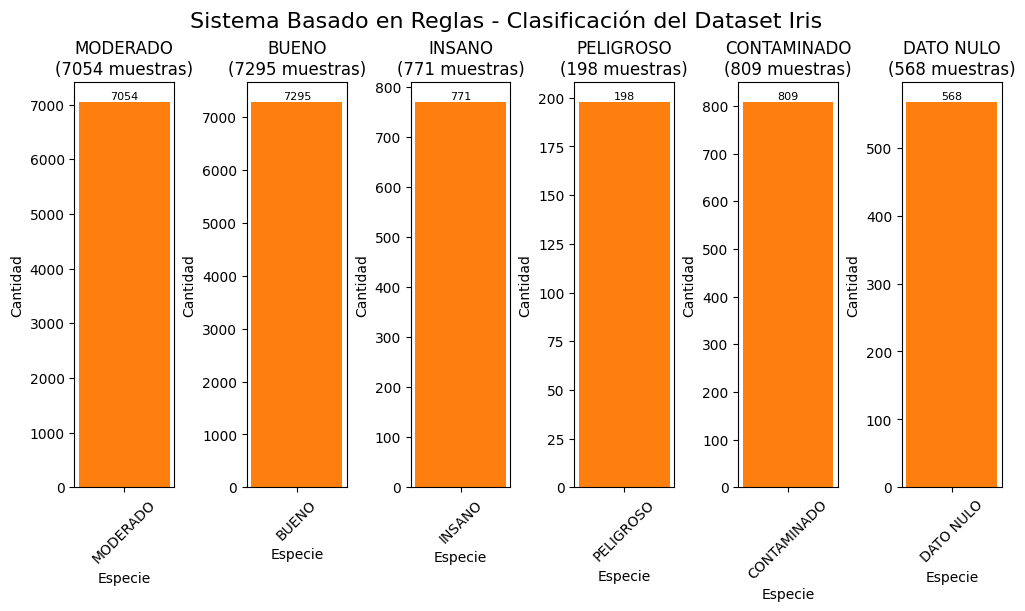

In [37]:
fig, axes = plt.subplots(1, len(nodos_finales), figsize=(10, 6), constrained_layout=True)

for ax, nodo in zip(axes, nodos_finales):
    nodo_data = data[data['CALIDAD'] == nodo]
    species_counts = nodo_data['CALIDAD'].value_counts()
    # Crear las barras
    bars = ax.bar(species_counts.index, species_counts.values)
    
    # Añadir las cantidades encima de las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Posición horizontal (centro de la barra)
            height,  # Posición vertical (altura de la barra)
            str(height),  # Texto a mostrar (la cantidad)
            ha='center', va='bottom', fontsize=8  # Alineación y tamaño de fuente
        )
    
    # Configurar títulos y etiquetas
    ax.bar(species_counts.index, species_counts.values)
    ax.set_title(f"{nodo}\n({len(nodo_data)} muestras)")
    ax.set_xlabel("Especie")
    ax.set_ylabel("Cantidad")
    ax.set_xticklabels(species_counts.index, rotation=45)

plt.suptitle("Sistema Basado en Reglas - Clasificación del Dataset Iris", fontsize=16)
plt.show()